# Pathway activity inference

In [38]:
# https://decoupler-py.readthedocs.io/en/latest/notebooks/progeny.html

In [14]:
import scanpy as sc
import anndata as ad
import decoupler as dc
import numpy as np
import hdf5plugin

# Plotting options, change to your liking
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

# Suppress warning
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [28]:
adata = sc.datasets.pbmc3k_processed()
adata

100%|██████████| 23.5M/23.5M [08:23<00:00, 48.9kB/s]


AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [29]:
adata.raw

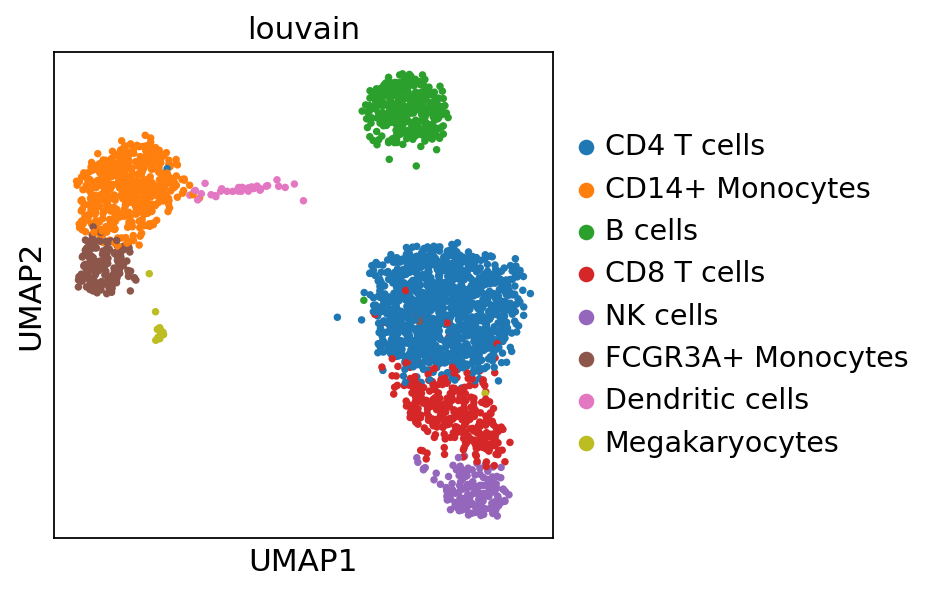

In [30]:
sc.pl.umap(adata, color='louvain')

In [31]:
progeny = dc.get_progeny(organism='human', top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


There are 14 pathways in progeny.

In [33]:
set(progeny['source'])

{'Androgen',
 'EGFR',
 'Estrogen',
 'Hypoxia',
 'JAK-STAT',
 'MAPK',
 'NFkB',
 'PI3K',
 'TGFb',
 'TNFa',
 'Trail',
 'VEGF',
 'WNT',
 'p53'}

To run decoupler methods, we need an input matrix (mat), an input prior knowledge network/resource (net), and the name of the columns of net that we want to use.

In [34]:
dc.run_mlm(
    mat=adata,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

1 features of mat are empty, they will be removed.
Running mlm on mat with 2638 samples and 13713 targets for 14 sources.


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


The obtained scores (t-values)(mlm_estimate) and p-values (mlm_pvals) are stored in the .obsm key:

In [36]:
adata.obsm['mlm_estimate']

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
AAACATACAACCAC-1,0.490807,3.429085,-1.039442,1.021546,-0.191043,-2.449629,-0.320055,-0.916050,-0.124890,2.243871,-0.675082,-1.272344,1.705516,-5.722435
AAACATTGAGCTAC-1,-0.466201,2.585619,-1.352572,1.552104,1.692952,-3.814195,-1.674760,0.388033,-1.621434,2.277023,0.742876,-1.315728,0.881299,-6.952012
AAACATTGATCAGC-1,0.201593,2.639026,-1.293042,1.610743,1.638279,-2.549840,-1.316797,-0.295223,-0.578435,3.047309,-0.326157,-1.112294,0.324730,-3.138159
AAACCGTGCTTCCG-1,-1.383697,3.073610,-0.274375,0.965905,7.269397,-3.850542,-3.170333,-2.129098,-0.257946,3.647278,0.726434,-1.122515,1.512029,-3.092223
AAACCGTGTATGCG-1,0.066506,2.647740,-0.498161,0.943159,3.156662,-0.177605,0.081432,-1.506024,0.177543,0.740944,0.213525,-0.016439,0.074150,-0.240806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,-1.039859,3.378978,-0.377936,2.363053,8.334864,-3.247122,-2.990556,0.047852,0.215979,3.591361,0.035670,-1.774676,1.227449,-1.182743
TTTCTACTGAGGCA-1,1.770347,1.534039,-0.031627,0.196966,3.509904,-3.166853,-1.301822,1.392411,-1.793370,1.649785,-2.002098,-0.923001,1.033538,-2.035008
TTTCTACTTCCTCG-1,0.953102,2.150581,-1.543154,0.925287,1.706014,-2.324983,-0.933966,-1.584633,0.437537,1.805767,1.886842,-1.383961,0.689709,-5.863463
TTTGCATGAGAGGC-1,-0.716598,2.011688,-0.350687,0.933495,0.839215,-1.235606,-1.230419,-0.841037,-0.187715,1.326490,1.442059,-2.402458,1.367666,0.374514


Note: Each run of run_mlm overwrites what is inside of mlm_estimate and mlm_pvals. if you want to run mlm with other resources and still keep the activities inside the same AnnData object, you can store the results in any other key in .obsm with different names, for example:

In [37]:
adata.obsm['progeny_mlm_estimate'] = adata.obsm['mlm_estimate'].copy()
adata.obsm['progeny_mlm_pvals'] = adata.obsm['mlm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## Visualization

To visualize the obtained scores, we can re-use many of scanpy’s plotting functions. First though, we need to extract the activities from the adata object.

In [39]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 2638 × 14
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals'

dc.get_acts returns a new AnnData object which holds the obtained activities in its .X attribute, allowing us to re-use many scanpy functions, for example let’s visualise the Trail pathway:

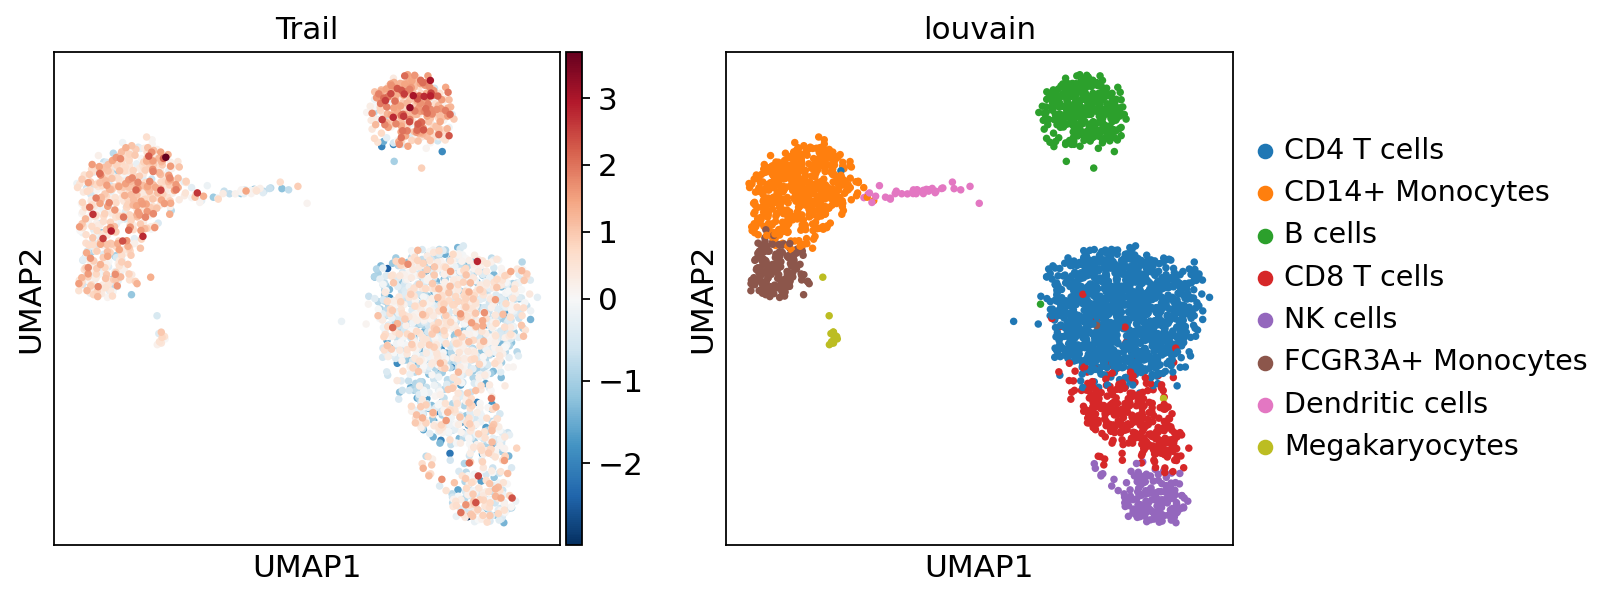

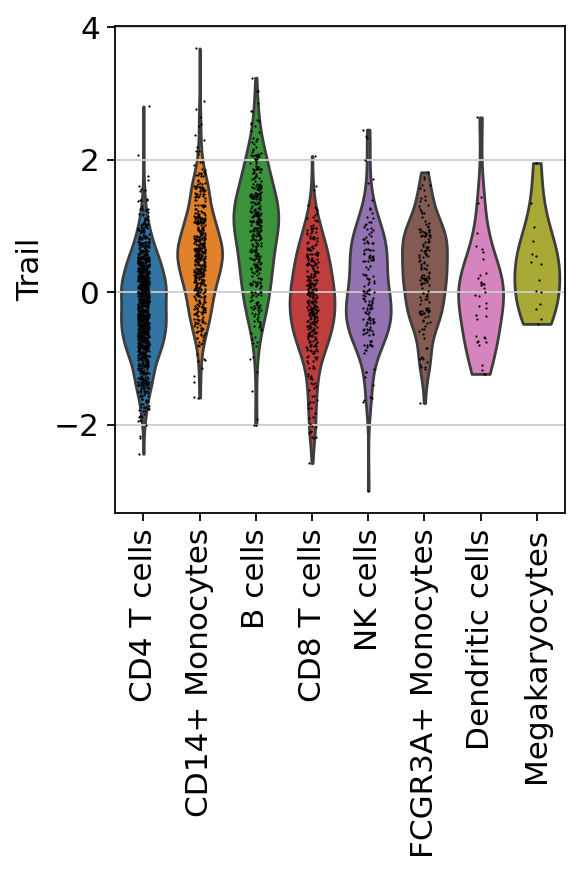

In [43]:
sc.pl.umap(acts, color=['Trail', 'louvain'], cmap='RdBu_r', vcenter=0)
sc.pl.violin(acts, keys=['Trail'], groupby='louvain', rotation=90)

It seem that in B cells, the pathway Trail, associated with apoptosis, is more active.

## Exploration

We can visualize which pathways are more active in each cell type:

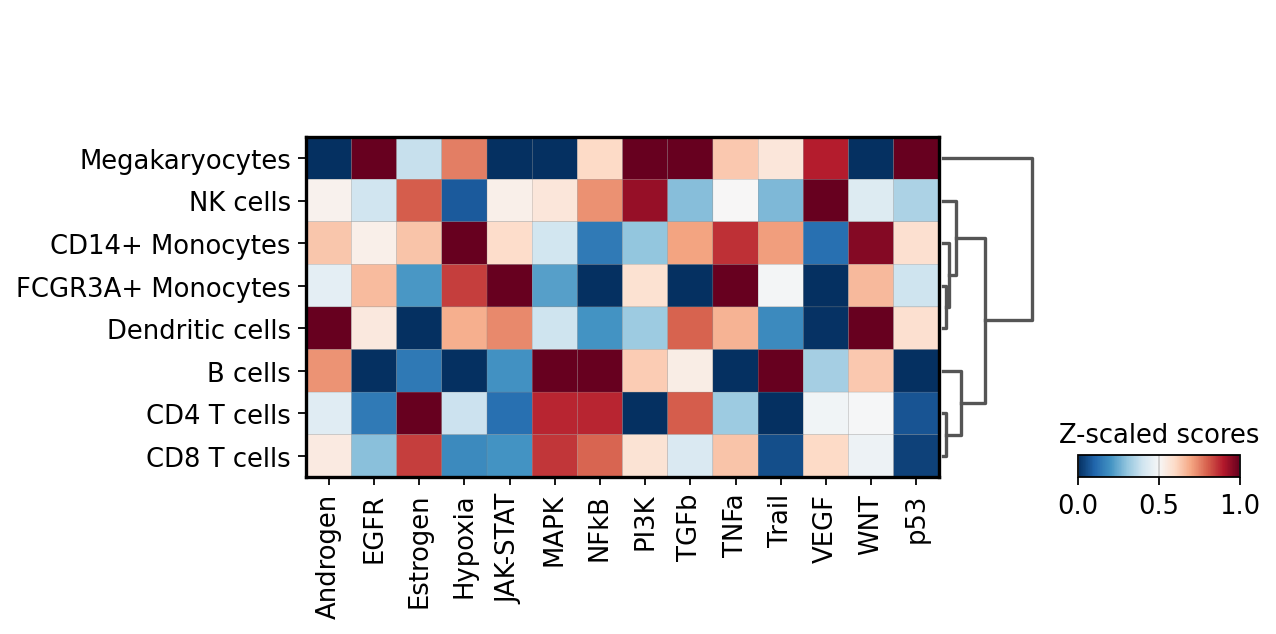

In [44]:
sc.pl.matrixplot(acts, var_names=acts.var_names, groupby='louvain', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

In this specific example, we can observe that EGFR to be more active in Megakaryocytes, and that Trail is more active in B cells.

Finally, we can check individual pathways by plotting their distributions:

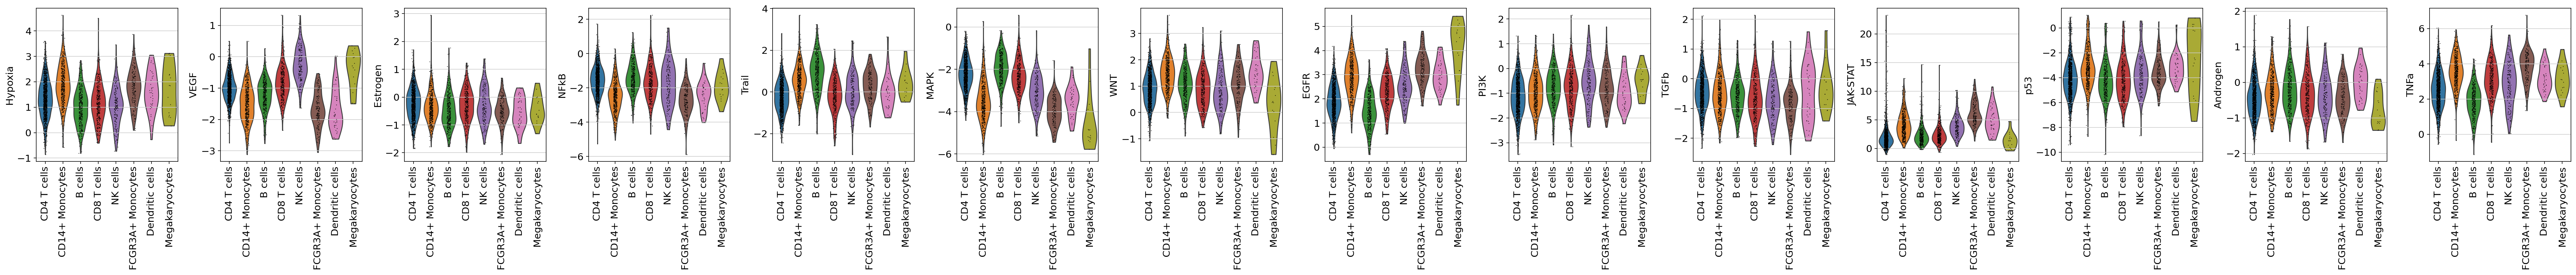

In [48]:
pathways = list(set(progeny['source']))

sc.pl.violin(acts, keys=pathways, groupby='louvain', rotation=90)

In [ ]:
sc.pl.violin(acts, keys=['EGFR'], groupby='louvain', rotation=90)